In [51]:
#Importing libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})

In [52]:
df = pd.read_csv('D:/Personal Projects/EDA Airlines Sentiment Analysis/Tweets.csv')

In [53]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [54]:
#Checking the data structure
df.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [55]:
#Max count is 14640. The field that has less than 14640 entry has null values in it
#Checking null values per field
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [56]:
#Finding different types of sentiments
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [57]:
#Entry per sentiment
df.groupby('airline_sentiment').size()

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64

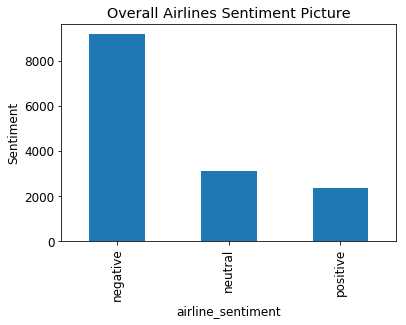

In [58]:
#Plotting bar chart of all sentiments
df.groupby('airline_sentiment').size().plot.bar()
plt.ylabel('Sentiment')
plt.title('Overall Airlines Sentiment Picture')

In [73]:
#Checking datatype of field airline_sentiment
df['airline_sentiment'].dtype

dtype('O')

In [85]:
#Creating a new column for every unique sentiments
df['negative'] = np.where(df['airline_sentiment']=='negative', 1, 0)
df['positive'] = np.where(df['airline_sentiment']=='positive', 1, 0)
df['neutral'] = np.where(df['airline_sentiment']=='neutral', 1, 0)

In [87]:
#Checking number of unique airlines
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

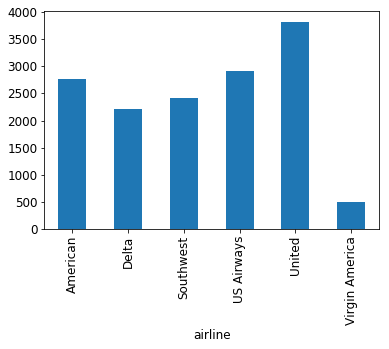

In [92]:
#Total number of review per airlines
df.groupby('airline').airline.count().plot.bar()

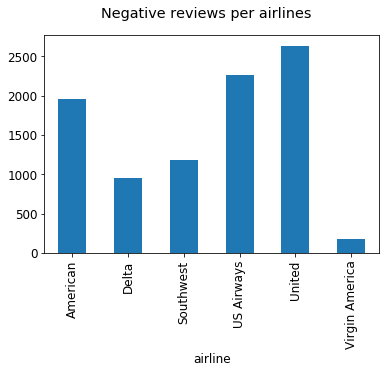

In [98]:
#Number of negative reviews per airline
df.groupby('airline').negative.sum().plot.bar()
plt.suptitle('Negative reviews per airlines')

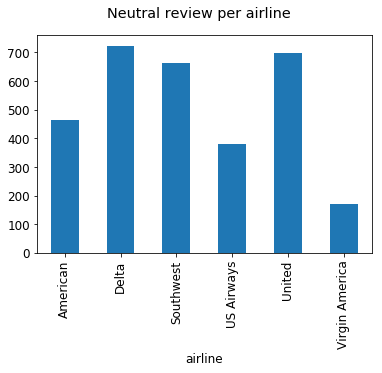

In [100]:
#Neutral review per airline
df.groupby('airline').neutral.sum().plot.bar()
plt.suptitle('Neutral review per airline')

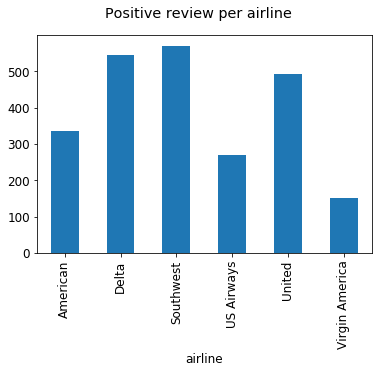

In [102]:
#Positive review per airline
df.groupby('airline').positive.sum().plot.bar()
plt.suptitle('Positive review per airline')